In [20]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import seaborn as sb
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

**GATHERING,PROCESSING AND CLEANING THE DATA**

In [8]:
house = pd.read_csv('/content/Housing.csv')

In [9]:
house

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316


In [10]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [11]:
house.pop('Address')

0       208 Michael Ferry Apt. 674\nLaurabury, NE 3701...
1       188 Johnson Views Suite 079\nLake Kathleen, CA...
2       9127 Elizabeth Stravenue\nDanieltown, WI 06482...
3                               USS Barnett\nFPO AP 44820
4                              USNS Raymond\nFPO AE 09386
                              ...                        
4995                     USNS Williams\nFPO AP 30153-7653
4996                PSC 9258, Box 8489\nAPO AA 42991-3352
4997    4215 Tracy Garden Suite 076\nJoshualand, VA 01...
4998                            USS Wallace\nFPO AE 73316
4999    37778 George Ridges Apt. 509\nEast Holly, NV 2...
Name: Address, Length: 5000, dtype: object

In [12]:
house.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price'],
      dtype='object')

In [15]:
y = house['Price']
x = house[['Avg. Area Income','Avg. Area House Age', 'Avg. Area Number of Rooms',
           'Avg. Area Number of Bedrooms', 'Area Population']]

**PLOTTING**

<Axes: xlabel='Price', ylabel='Count'>

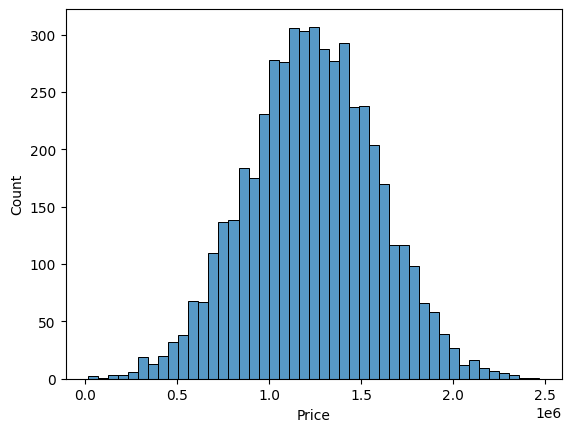

In [16]:
sb.histplot(house['Price'])

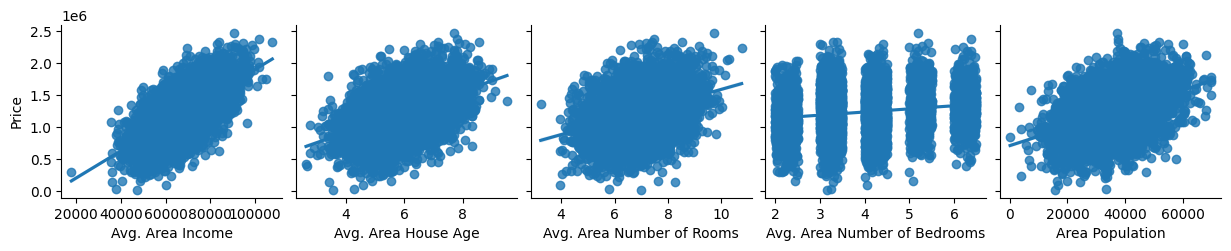

In [17]:
sb.pairplot(house,x_vars = ['Avg. Area Income','Avg. Area House Age', 'Avg. Area Number of Rooms',
           'Avg. Area Number of Bedrooms', 'Area Population'],y_vars='Price',kind = 'reg')
plt.show()

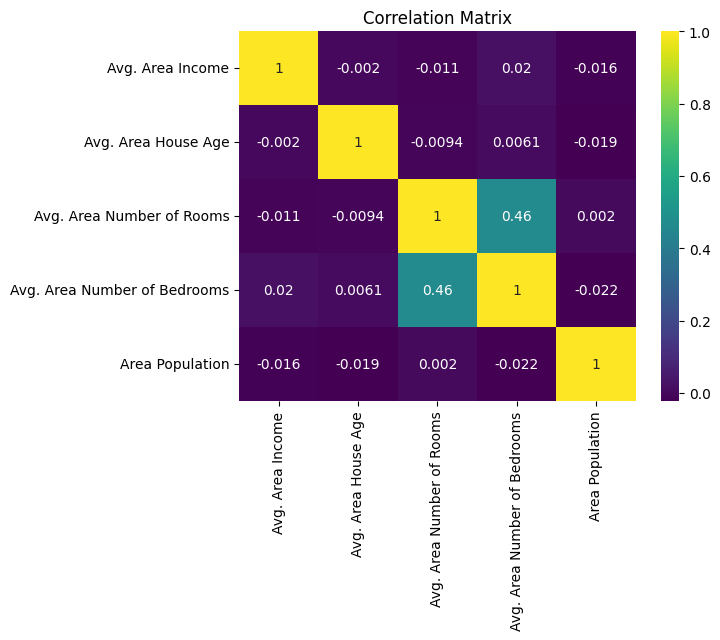

In [18]:
co_matrix = house[['Avg. Area Income','Avg. Area House Age', 'Avg. Area Number of Rooms',
           'Avg. Area Number of Bedrooms', 'Area Population']].corr()
sb.heatmap(co_matrix,annot=True,cmap='viridis')
plt.title('Correlation Matrix')
plt.show()

**TRAINING AND TESTING**

In [21]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)

In [22]:
houselr = LinearRegression()

In [23]:
houselr.fit(xtrain,ytrain)

LinearRegression()

In [24]:
houselr.coef_

array([2.16066847e+01, 1.65339372e+05, 1.20875271e+05, 2.21710183e+03,
       1.52800495e+01])

In [27]:
pd.DataFrame(houselr.coef_,index=x.columns,columns=['mycoef'])

,mycoef
Avg. Area Income,21.606685
Avg. Area House Age,165339.371738
Avg. Area Number of Rooms,120875.270900
Avg. Area Number of Bedrooms,2217.101826
Area Population,15.280049


from matplotlib import pyplot as plt
_df_0['mycoef'].plot(kind='hist', bins=20, title='mycoef')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['mycoef'].plot(kind='line', figsize=(8, 4), title='mycoef')
plt.gca().spines[['top', 'right']].set_visible(False)

In [28]:
pr = houselr.predict(xtest)

**METRICS**

In [29]:
r2_score(ytest,pr)

0.9116612670817721

In [30]:
mean_absolute_error(ytest,pr)

81241.0415288043

In [31]:
mean_squared_error(ytest,pr)

10258282819.712116

**PREDICTION**

In [34]:
Income = float(input('Enter Average Area Income: '))
Age = float(input('Enter Average Area House Age: '))
Rooms = float(input('Enter Average Number of Rooms: '))
BedRooms = float(input('Enter Average Area Number of Bedrooms: '))
Population = float(input('Enter Area Population: '))
print('The predicted House Price is : ',float(houselr.predict([[Income,Age,Rooms,BedRooms,Population]])[0]))

Enter Average Area Income: 100000
Enter Average Area House Age: 12
Enter Average Number of Rooms: 8
Enter Average Area Number of Bedrooms: 12
Enter Area Population: 35000
The predicted House Price is :  3028940.9925365755


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
